# Layout a circuit

You can create a circuit layout using a combination of cells made available by default in ``gdsfactory``, predefined cells available in the PDK you're using, and custom cells you've defined yourself.

In [1]:
import gdsfactory as gf

And there you go! 

Now that your gds is a component in GDS Factory, you can use it in conjunction with other GDS Factory functions to create more complicated designs. For example, GDS Factory's cutback_splitter function can be used to create {term}`cutbacks` using this splitter. 

In [2]:
cutbacks = gf.components.cutback_splitter(component=c)
cutbacks = gf.routing.add_fiber_array(cutbacks, with_loopback = False)
cutbacks.plot()

NameError: name 'c' is not defined

### Connecting Components

Once you have created your components and perhaps tested them individually, you may want to connect them into a larger circuit with a more sophisticated function. To do this, you can use the "connect" function from GDS Factory.

This function takes in two ports as arguments. The first is the port in the component you are calling connect on that will attach to the second port, or the "destination" port.

As a simple example, we could use the following code to connect two waveguides to form a component:

2023-05-09 11:33:08.609 | INFO     | gdsfactory.config:<module>:50 - Load '/home/ebang4/miniconda3/envs/pmp/lib/python3.11/site-packages/gdsfactory' 6.27.0
2023-05-09 11:33:10.020 | INFO     | gdsfactory.technology.layer_views:__init__:779 - Importing LayerViews from KLayout layer properties file: /home/ebang4/miniconda3/envs/pmp/lib/python3.11/site-packages/gdsfactory/generic_tech/klayout/tech/layers.lyp.


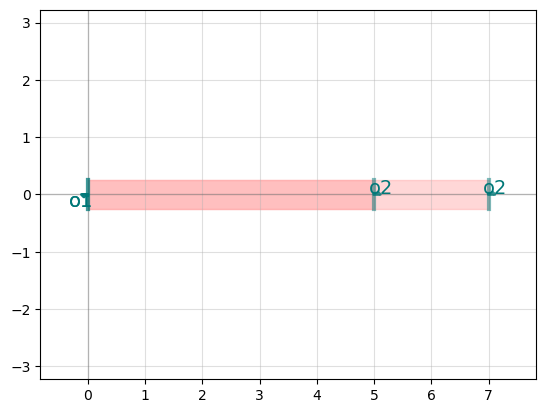

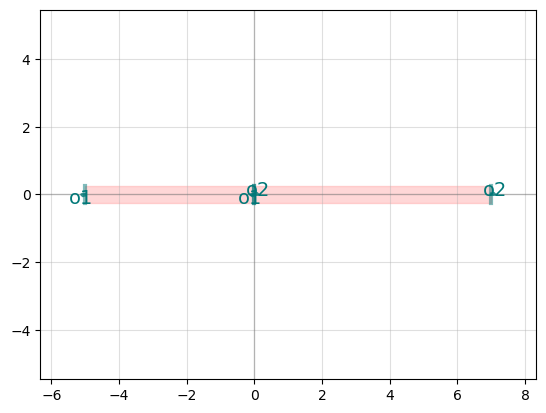

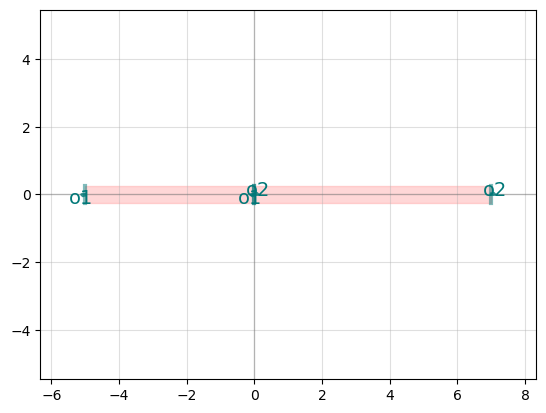

In [ ]:
import gdsfactory as gf

# Create a component
c = gf.Component()

# Add references to two straight waveguides
wg_1 = c << gf.components.straight(length=5)
wg_2 = c << gf.components.straight(length=7)

# The contents of the component before connecting
c.plot()

# Connect the two waveguides and plot the final result
# To "o2" on wg_1, connect "o1" on wg_2
wg_1.connect("o2", destination=wg_2["o1"])
c.plot()

As your connections get more complex, be aware of the order in which you connect components. GDS Factory automatically moves components as they are connected, and they may be moved in ways you don't want. For example, the final geometry of the preceding example would be at different location if you used

```wg_2.connect("o1", destination=wg_1["o2"])```

Although the same two ports are being connected, the result differs because you are now connecting wg_1 to wg_2 and not wg_2 to wg_1. Essentially, take care when laying out the sequence of your connections.

### Connecting With an ASCII Sequence
If you have many connections that you need to make that only require a few components, you can connect components with an ASCII sequence.

To do this, you must create a dictionary to map ASCII symbols to components. Then you create a sequence to feed into ```gf.components.component_sequence```. For example, if we wanted to connect waveguides of different lengths in a repeating pattern you can print out the ports of a component if you aren't sure which is which. This will help you as you are making your connections. Also, it's good to double check your connections.



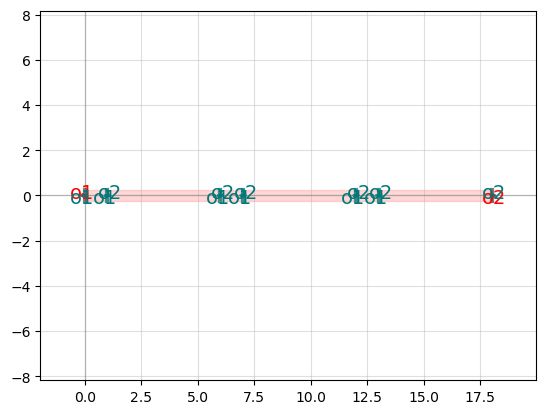

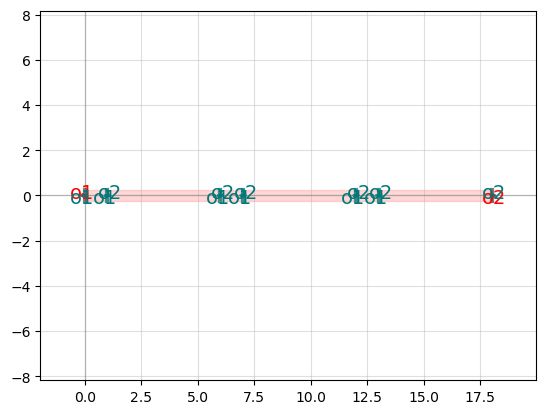

In [ ]:
import gdsfactory as gf
short_wg = gf.components.straight(length=1)
long_wg = gf.components.straight(length=5)

symbol_to_component = {
    "S": (short_wg, "o1", "o2"),
    "L": (long_wg, "o1", "o2"),
}

sequence = "SLSLSL"
s = gf.components.component_sequence(sequence=sequence, symbol_to_component=symbol_to_component)
s.plot()

### Connecting Grating Couplers
Unless you plan on having an edge-coupled chip, you will most likely need {term}`grating couplers` to couple light into your circuit. So, the last component that you will want to connect to your circuit is grating couplers. ```add_grating_couplers``` automatically connects grating couplers to the ports in your component. Before using this function, you may want to make sure that your component/circuit has its ports specified. You don't have to, but it makes it easier to use this function. The function requires that you specify the component you are adding grating couplers to. If you have a component with many references in it, the function may try and add grating couplers to the ports of each reference, instead of just the main input and output ports. So, you either have to pass in arguments for the ```select_ports``` parameter, or just create new ports for the component. Going back to our example with the two straight waveguides, we can add ports to the ends of the now longer waveguide, absorb the references so that it truly appears as just one waveguide, and then add the grating couplers.

In [ ]:
# Add ports to the input and output
c.add_port("o1", port=wg_1.ports["o1"])
c.add_port("o2", port=wg_2.ports["o2"])

# Absorbe the references to the two waveguides
for i in range(len(c.references)-1, -1, -1):
    c.absorb(c.references[i])
    
# Add grating couplers
c = gf.components.add_grating_couplers(c)
c.plot()